In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv


# Netflix TV Shows and Movies Data Visulaization

<img src="https://www.mediaplaynews.com/wp-content/uploads/2020/07/NetflixMovies-e1562680684928.jpg" style="border-radius:5%; width:30%; text-align:center"/>
</br>
With the rise of streaming services, audiences are more than ever relying on services such as Netflix, Hulu, and Disney+ to watch their TV shows and Movies. That being the case, large box studio companies shift their market towards these online streaming services. However, these services use a subscription modelt that heavily depends on the subscriber count for it to thrive. </br></br>

As data analysts, it is our job to find the best content to give these services a strong subscriber retention value whilst increasing its current subscriber count. We then analyze if the current catalogue matches the recommended business strategy from our analysis.

This notebook showcases various visualization techniques using the seaborn library and pandas as the main library for data analysis

### Prerequisite Libraries

Lets import the following libraries:
- Seaborn (Visualization)
- Pandas (Data Analysis)
- Matplotlib (Visualization)
- RegEx (String Formatting)
- TQDM (Percentage Visualization)

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
from IPython.display import display

## Exploratory Analysis

Lets first import the dataset and take a peak into the dataframe.

In [3]:
titles = pd.read_csv("../input/netflix-tv-shows-and-movies/titles.csv")
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


We see there a total of 15 features in this dataset. There also seems to be some labels with missing features such the IMDB Score and Votes of ***Five Came Back: The Reference Films***. Moreover, the dataframe is structured in such a way that the movies do not have any data listed in the seasons column. Furthermore, we can also see that the genres are listed in some kind of string array. We'll fix that later on.

Now lets take a look on the numerical values within the dataframe

In [4]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


There seems to be a lot of missing values. Lets take a deeper dive

In [5]:
print("Missing Values:")
for column in titles.columns:
    no = titles[titles[column].isna()].shape[0]
    print(f"{column}:{no}")

Missing Values:
id:0
title:1
type:0
description:18
release_year:0
age_certification:2619
runtime:0
genres:0
production_countries:0
seasons:3744
imdb_id:403
imdb_score:482
imdb_votes:498
tmdb_popularity:91
tmdb_score:311


From what we can see, there's a significant portion of missing data with the **age certification** from the data. It is also apparent that **the ratings have missing data** on several titles. For this analysis, we will primarily focus on the TMDB Popularity and the TMDB Score.

## Ratings Between Genres

Lets take a deeper dive on the genres within the data. As mentioned above, the data's genre has a array formatted into a string *(e.g. "['action', 'drama'])*. Let's fix that first and create **a pie chart of the distribution of genres** from Netflix's catalogue.

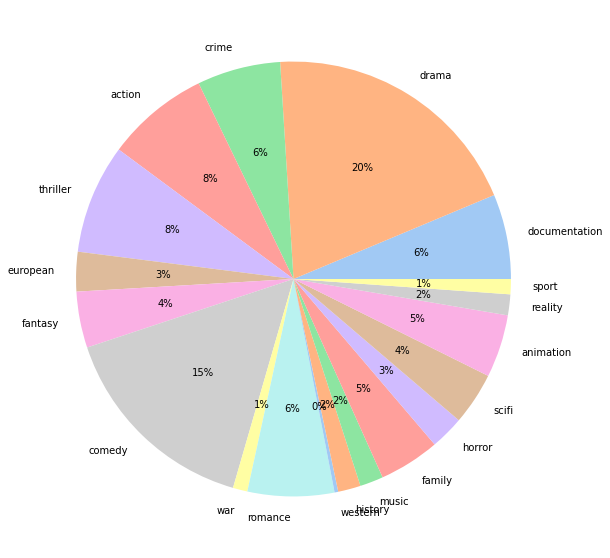

In [6]:
#convert genre string to list using regex
titles.genres = titles['genres'].apply(lambda x: re.findall(r"\w+", x))

#get all genres and make piechart
genres = {}
for row in titles.genres:
    for genre in row:
        if genre not in genres.keys():
            genres[genre] = 1
        else:
            genres[genre] += 1

labels, data = (list(genres.keys()), list(genres.values()))
colors = sns.color_palette('pastel')[0:len(labels)]

#Create a pie chart with the gathered data
plt.figure(figsize=[21,10])
plt.pie(data, labels=labels, colors = colors, autopct='%.0f%%')
plt.show()

A huge portion comes from the **drama gennre with 20%** of the total catalogue. The next genre wit the highest share is **comedy with 15%**. This tells us that the 35% of Netflix's category comes from either drama or comedy. Now let's take a dive on the average ratings of each genre to see how well they perform.

Gathering Genre Catalogue


100%|██████████| 19/19 [00:20<00:00,  1.07s/it]

Done, Created unique_genres_dct and unique_genres
Creating Bar Plot


None

,Average
Genres,
animation,7.327537
reality,7.222589
history,7.192072
family,7.183297
scifi,7.164805
fantasy,7.136131
war,7.081472
music,7.075592
documentation,7.041993


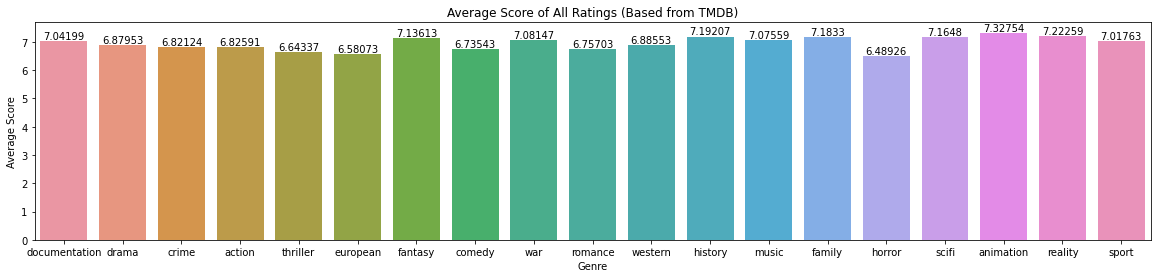

In [27]:
def genre_indexes(genre, titles=titles):
    idx_list=[]
    for row in range(titles.shape[0]):
        item = titles.iloc[row,:]
        for value in item.genres:
            if value == genre:
                idx_list.append(item.id)
    return idx_list

#Create a dictionary with a list of all ids containing a certain genre
unique_genres = list(genres.keys())
unique_genres_dct = {}

print('Gathering Genre Catalogue')
for genre in tqdm(unique_genres):
    unique_genres_dct[genre] = genre_indexes(genre)
print('Done, Created unique_genres_dct and unique_genres')

#Create a seperate DataFrame for genre score
genre_score = titles.loc[:,['id','tmdb_score']]

#Get all the scores of each genre and store in a dictioary
genre_score_dct = {}
for genre in unique_genres:
    value=genre_score.loc[genre_score['id'].isin(unique_genres_dct[genre])]['tmdb_score'].mean()
    genre_score_dct[genre] = value

#Create a barplot from the data
print('Creating Bar Plot')
fig,ax = plt.subplots(figsize=[20,4])
ax = sns.barplot(x=list(genre_score_dct.keys()), y=list(genre_score_dct.values()))
ax.set_title('Average Score of All Ratings (Based from TMDB)')
ax.set_xlabel('Genre')
ax.set_ylabel('Average Score')
ax.bar_label(ax.containers[0])

display(fig.show())

#Create a DataFrame from the gathered data
genres_df = pd.DataFrame({
    'Genres':list(genre_score_dct.keys()),
    'Average':list(genre_score_dct.values())
}).set_index('Genres')

display(genres_df.sort_values(by='Average', ascending=False))


From the data above, we can concure that ***comedy and drama perform relatively worse*** from the rest of the genres. All though it doesn't mean to say that they are bad given the deviation of averages is just around **1 score unit**. It does show that there is a *preference towards animation, reality, and history media*.

Now lets look at the economics of making a show/movie. Each second of additional runtime of any media will cost a lot of money. So as stakeholders in the company, **let's take a look on how well each genre performs in respect to its runtime**.

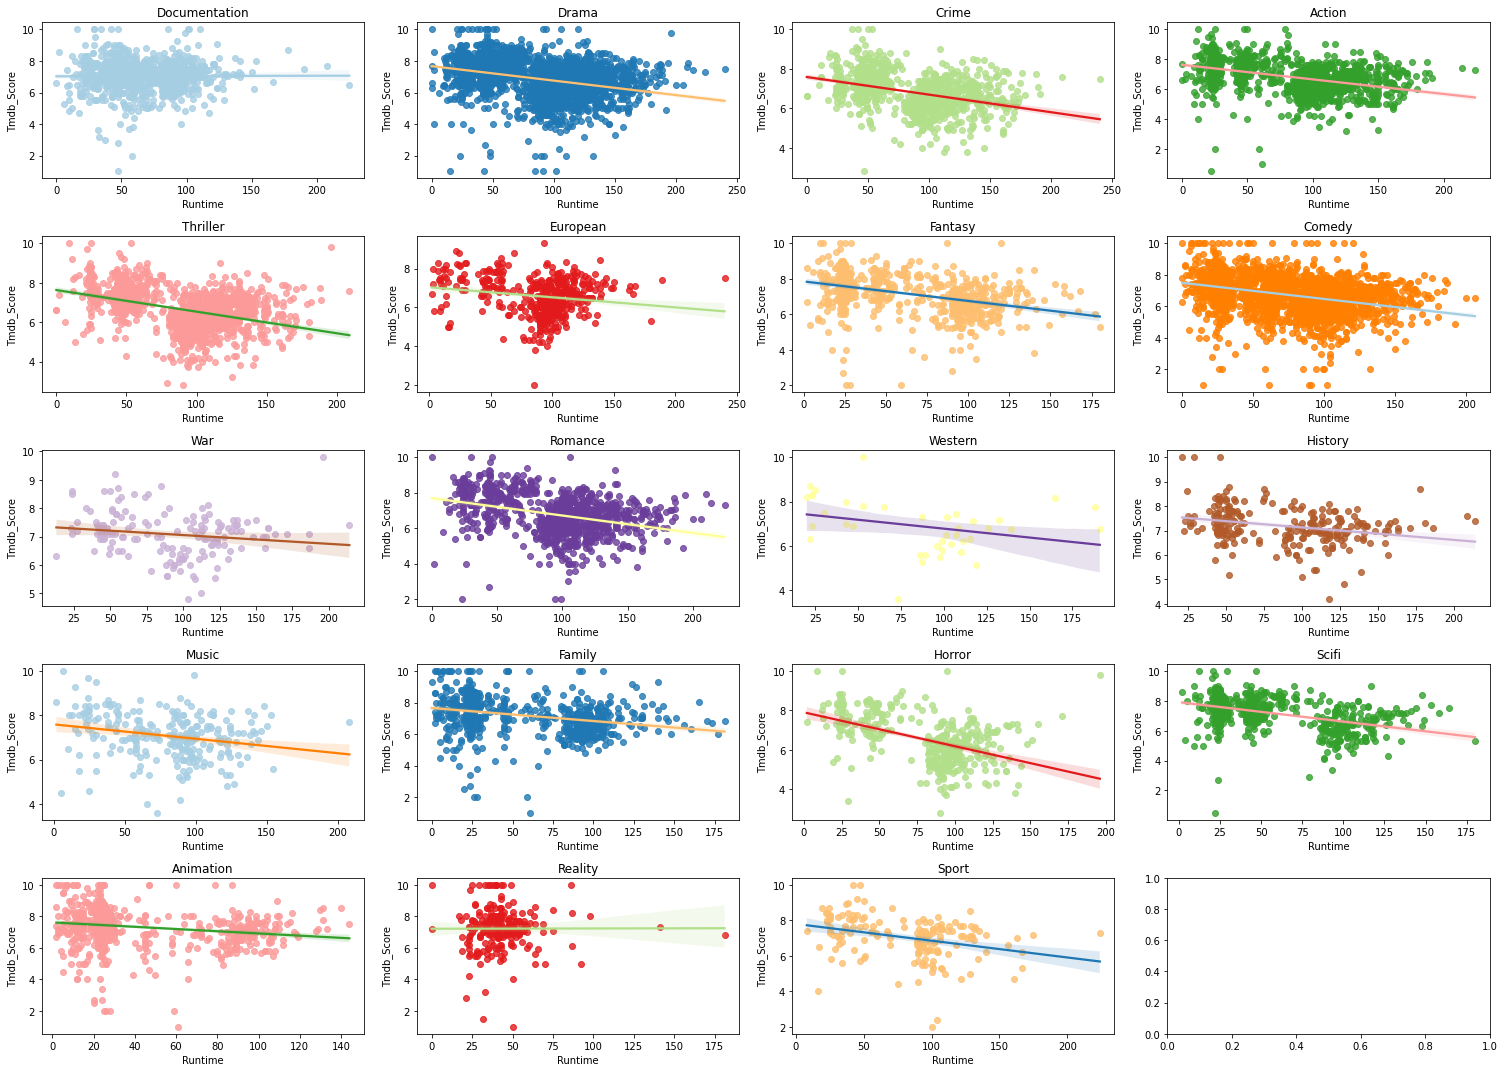

In [12]:
import random 
#create a scatterplot diagram of all genres with 2 variables as an input
def plot_scatterplot_genre(x,y,unique_genres_dct=unique_genres_dct,unique_genres=unique_genres,titles=titles, color_palette='pastel'):
    fig,ax = plt.subplots(ncols=4,nrows=int(len(unique_genres)/4)+1, figsize=[21,15])
    colors = sns.color_palette(color_palette, len(unique_genres))
    
    for idx, genre in enumerate(unique_genres):
        genre_df = titles.loc[titles['id'].isin(unique_genres_dct[genre])]
        axes = ax[int(idx/4),idx%4]
        sns.regplot(ax = axes, x = genre_df[x], y=genre_df[y], color=colors[idx], line_kws={"color":colors[-idx]})
        axes.set_xlabel(x.title())
        axes.set_ylabel(y.title())
        axes.set_title(genre.title())
    fig.tight_layout()
    plt.show()

plot_scatterplot_genre(x='runtime',y='tmdb_score', color_palette='Paired')

There are **several observations** we can conclude from the diagram above.
1. Most genres **perform poorly** as runtime increases.
2. From the three highest rated genres, only Reality performs **seemingly well** as the runtime increases. *(it is noted that there are data with extreme values thus the higher variance)*
3. Drama and Comedy performs **especially poorly** with increased runtime.
4. Horror has the **worst performance** as runtime increases.
5. The only genre that **performs well** with loger runtimes is Documentation.

From this, it is safe to say that it is ecomically *more viable to have lower runtimes* unless you are doing a documentary or a reality movie/show.


## Shows vs Movies

Now let's take a look at the relationship between shows and movies. As a general overview, let's see the distribution between shows and movies.

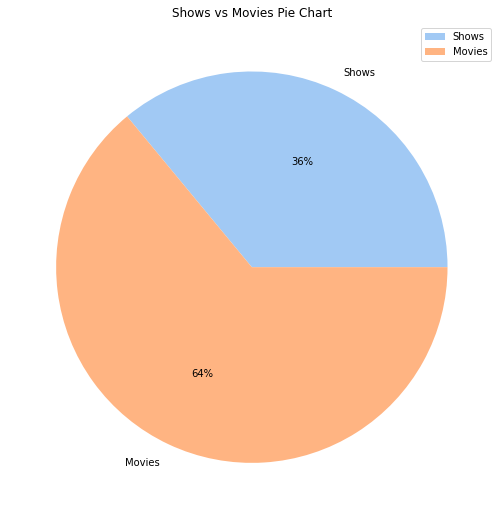

In [32]:
show_num=titles.loc[titles.type=='SHOW'].shape[0]
movie_num=titles.loc[titles.type=='MOVIE'].shape[0]

data=[show_num,movie_num]
label=['Shows','Movies']

plt.figure(figsize=[12,9])
plt.pie(data, labels=label, autopct='%.0f%%', colors=sns.color_palette('pastel', 2))
plt.title('Shows vs Movies Pie Chart')
plt.legend()
plt.show()

The diagram shows that Netflix has a dominating **Movie Catalogue**. This reflects the fact that a show usually has **more than one video** and is rather a collection of videos that is segregated into seasons. How about we'll take a look at the relationship between the score and the release year of both show and movies and see how users perceive each.

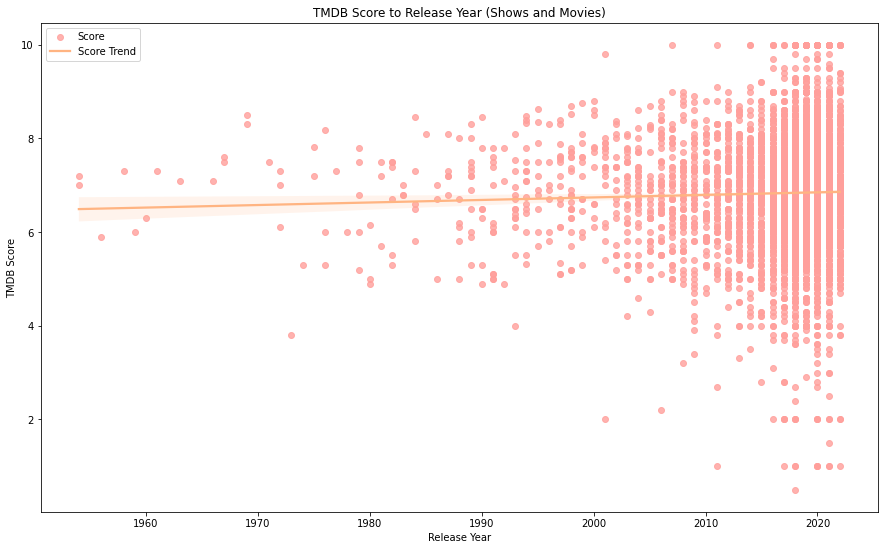

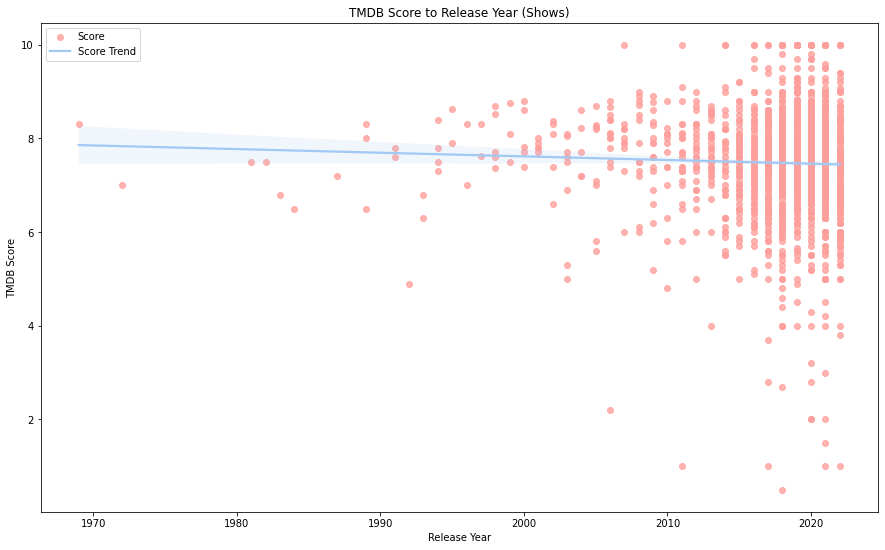

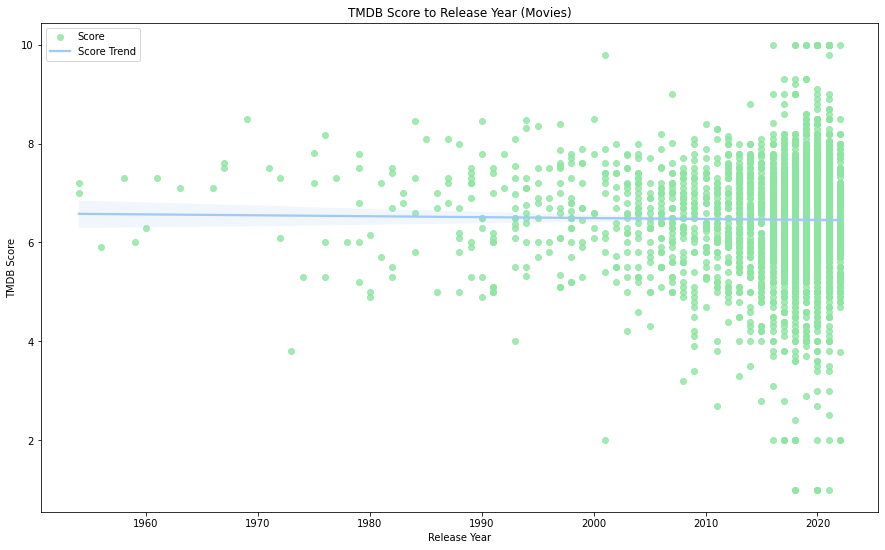

In [79]:
#Create Regplot of TMDB Sscore vs Release Year
def release_year_vs_score(titles,graph_title):
    fig,ax = plt.subplots(figsize=[15,9])
    colors=sns.color_palette('pastel',10)
    ax = sns.regplot(x = titles['release_year'], y = titles['tmdb_score'], color=colors[random.randint(0,10)],line_kws={'color':colors[random.randint(0,10)],'label':'Score Trend'},label='Score')
    ax.set_title(graph_title)
    ax.set_xlabel('Release Year')
    ax.set_ylabel('TMDB Score')
    ax.legend()
    fig.show()

shows = titles.loc[titles.type=='SHOW']
movies = titles.loc[titles.type=='MOVIE']

comp_dfs = [[titles,'TMDB Score to Release Year (Shows and Movies)'],
            [shows,'TMDB Score to Release Year (Shows)'],
            [movies,'TMDB Score to Release Year (Movies)']]

for arry in comp_dfs:
    release_year_vs_score(arry[0],arry[1])
    

The data above shows that there is a slow decline in average ratings. This is reflected on the discussion made by [Nathaniel Johnston in 2009](http://http://www.njohnston.ca/2009/10/imdb-movie-ratings-over-the-years/) where he shows that average movie ratings have gone down over the years. In his words,
> *The more likely explanation is that movies from the 1950’s  through 1970’s have artificially higher scores because people don’t generally go back and watch the crummy movies of the last generation, so they get forgotten and do not have 1000 votes on IMDb.*

However, if we put them together, there is in fact an **increase ratings**. This may be because there are more entries in the later years where ratings are higher compared to the lower number of entries for older films/shows. This is apparent in the figure below. 

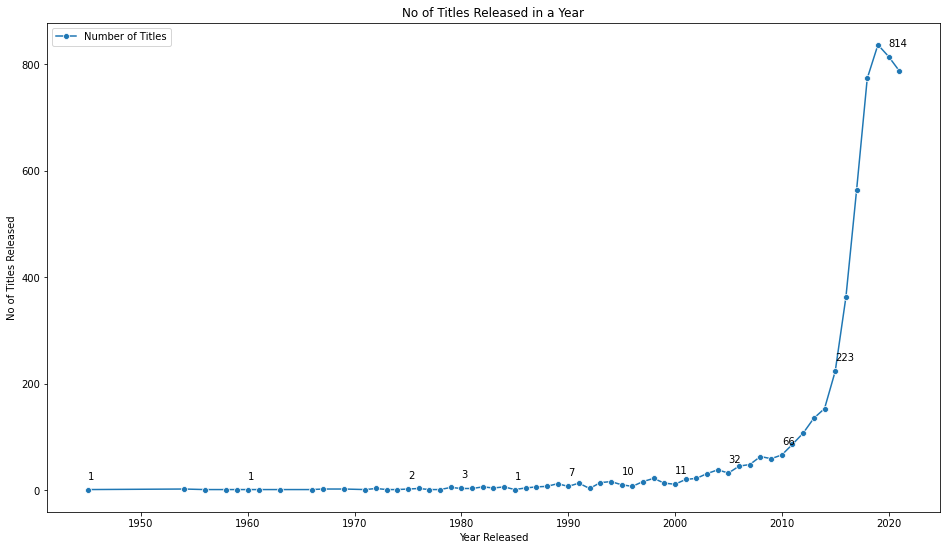

In [89]:
release_year_df_count = titles.groupby(by='release_year').count()
fig,ax = plt.subplots(figsize=[16,9])
sns.lineplot(ax=ax, x=release_year_df_count.index.to_list()[:-1],y=release_year_df_count['id'][:-1], marker='o',palette='pastel', label='Number of Titles')
ax.set_ylabel("No of Titles Released")
ax.set_xlabel("Year Released")
ax.set_title("No of Titles Released in a Year")
ax.legend()
for i in release_year_df_count.index.to_list():
    if i%5==0:
        ax.annotate(release_year_df_count.loc[i,'id'],[i, release_year_df_count.loc[i,'id']+20])

With that being the case, this makes ratings done in the later years tend to be **more accurate** given that there are more people who are rating these said films/movies. Now let's look at the data **overall average ratings between shows and movies**.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 31.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 51.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


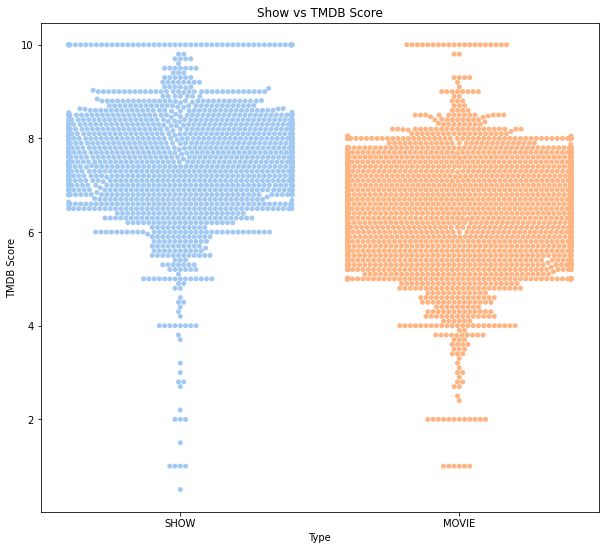

In [83]:
fig,ax = plt.subplots(figsize=[10,9])
ax = sns.swarmplot(data=titles, x='type',y = 'tmdb_score', palette='pastel')
ax.set_title('Show vs TMDB Score')
ax.set_xlabel('Type')
ax.set_ylabel('TMDB Score')
fig.show()

The figure above shows the swarmplot of shows and movies. The data shows that there is indeed a higher average rating from shows. There are also more shows with the highest TMDB Score of 10. 

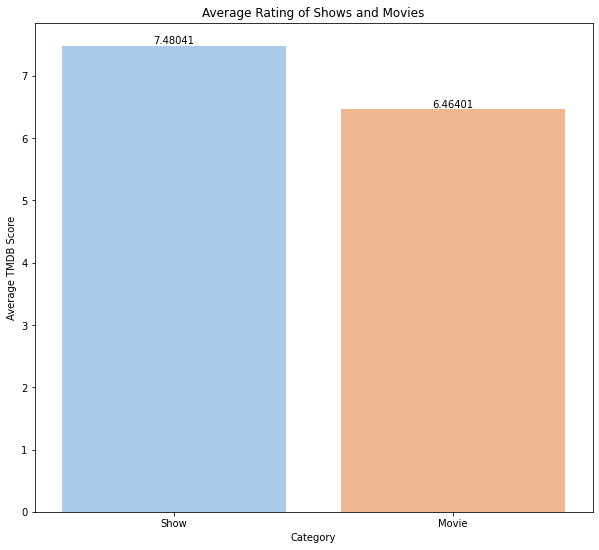

In [91]:
show_score = titles['tmdb_score'].loc[titles['type'] == 'SHOW'].mean()
movie_score = titles['tmdb_score'].loc[titles['type'] == 'MOVIE'].mean()

fig,ax = plt.subplots(figsize=[10,9])
sns.barplot(ax=ax,x=['Show', 'Movie'], y=[show_score,movie_score], palette='pastel')
ax.set_xlabel("Category")
ax.set_ylabel("Average TMDB Score")
ax.set_title("Average Rating of Shows and Movies")
ax.bar_label(ax.containers[0])
fig.show()

It is more apparent in the bar plot where extremities are smoothen out that shows indeed have the highest averages. However, it must be noted that shows have **decreased in ratings** more so than movies over the years. The figure below shows the relationship between *release year* and *scores* over the years.

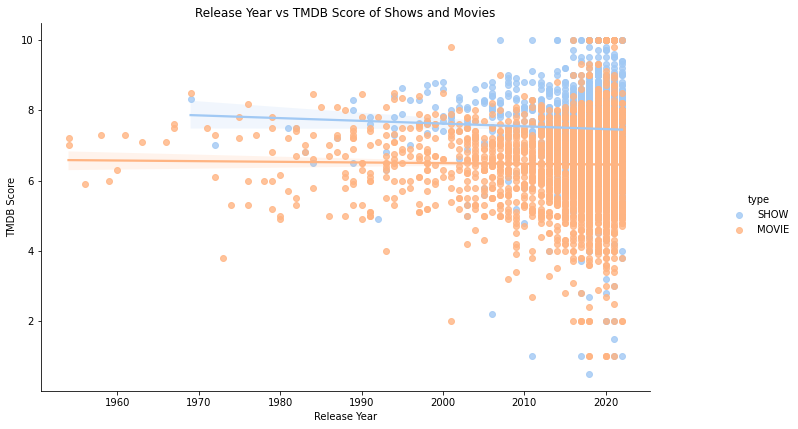

In [98]:
ax = sns.lmplot(data = titles, x = 'release_year', y = 'tmdb_score', hue='type', palette='pastel')
ax.figure.set_size_inches(12,6) 
ax.set(xlabel='Release Year', ylabel='TMDB Score', title='Release Year vs TMDB Score of Shows and Movies')
fig.show()

As seen by the figure above, there is a clear downward decline of a show's average ratings as compared to movies. This is further shown by the bar graph below.

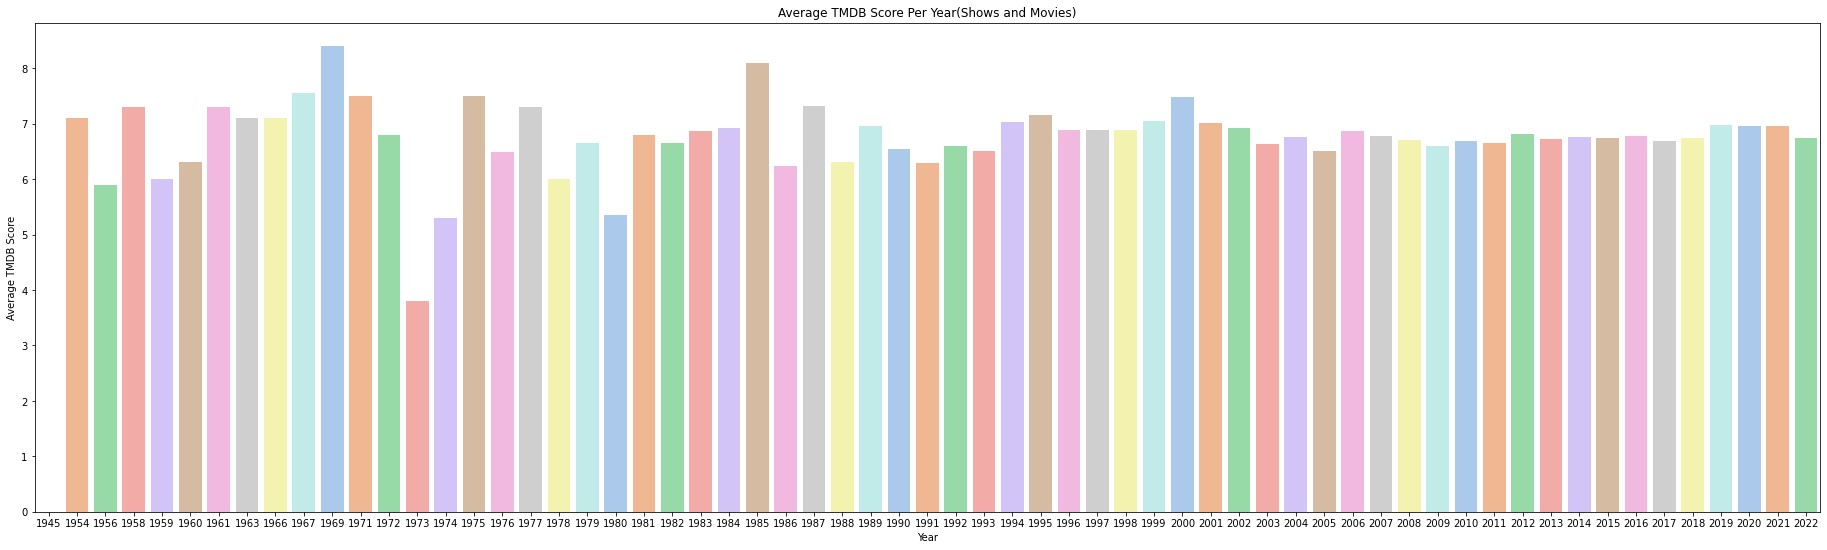

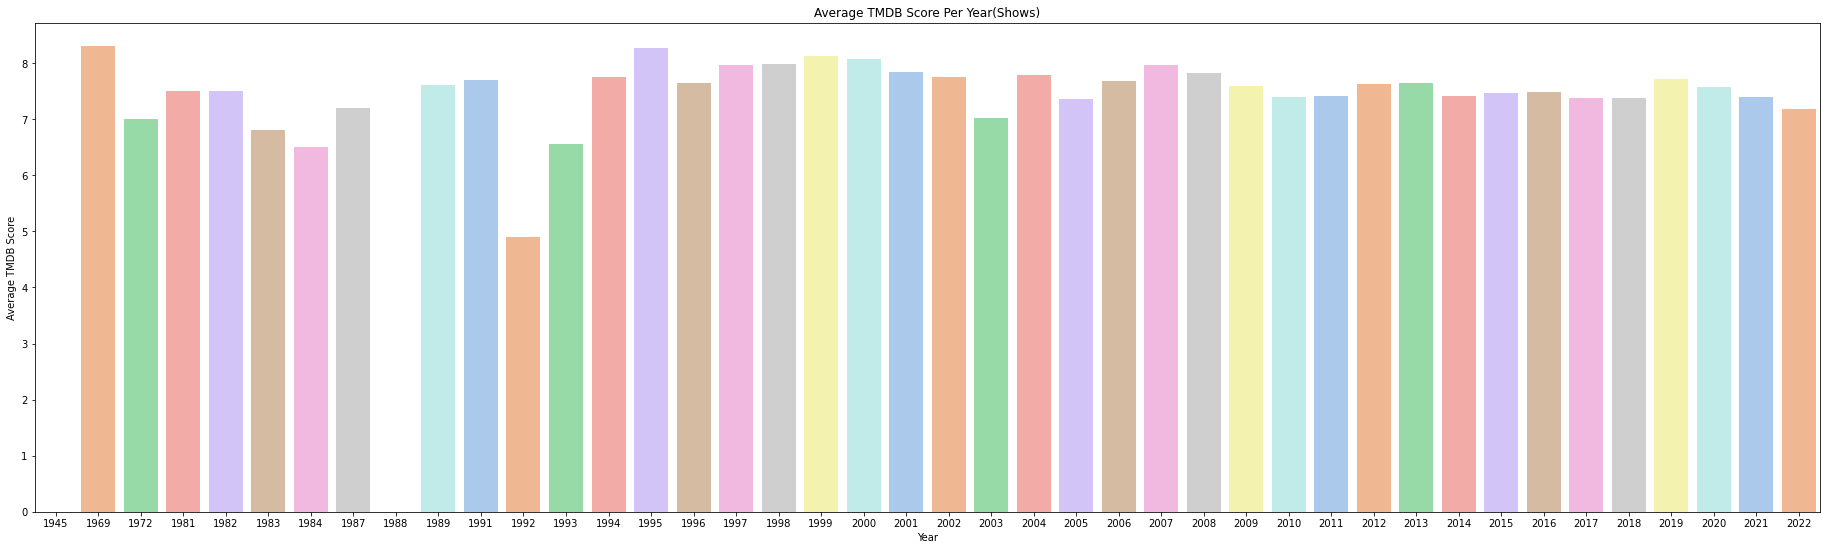

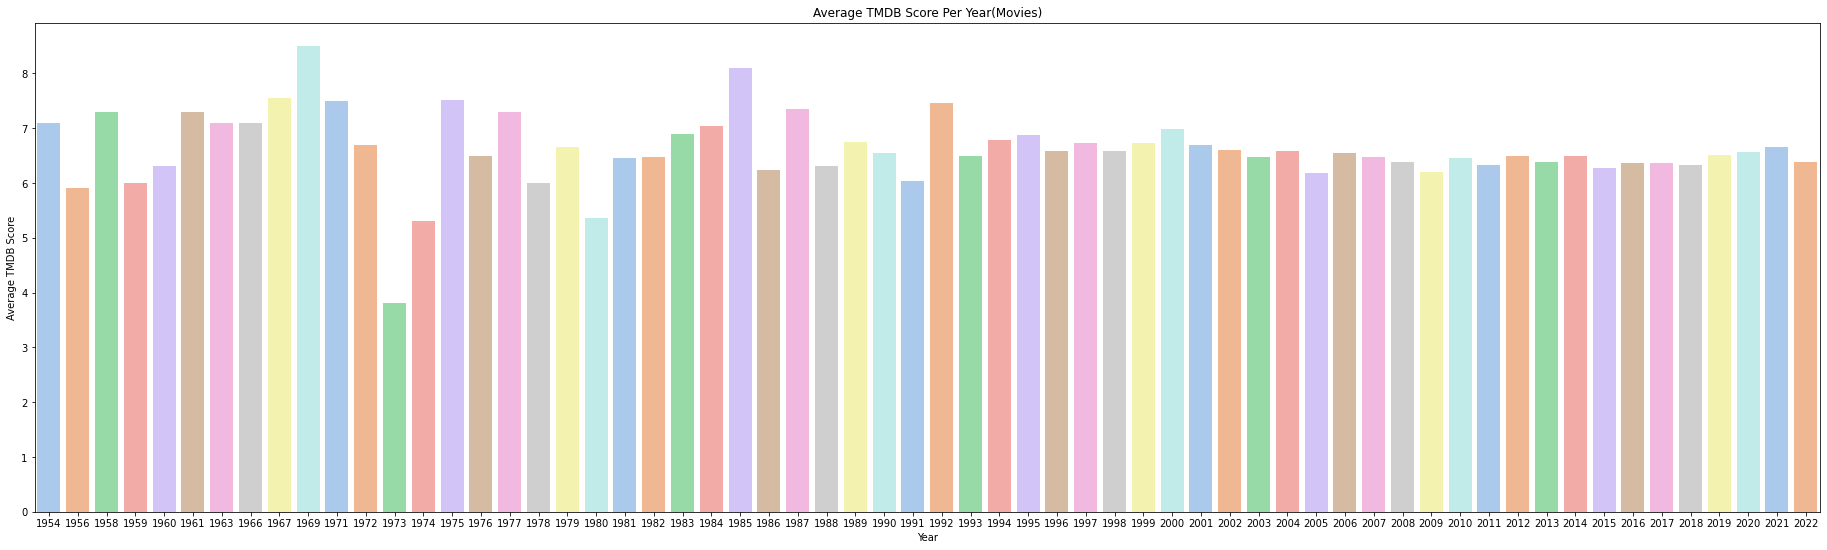

In [104]:
def release_year_bar(titles, bar_title):
    release_year_df_mean = titles.groupby(by='release_year').mean()

    fig,ax = plt.subplots(figsize=[32,9])
    sns.barplot(ax = ax, x = [int(i) for i in release_year_df_mean.index.to_list()], y=release_year_df_mean['tmdb_score'], palette='pastel')
    ax.set_title(bar_title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Average TMDB Score")
    fig.show()

#get dfs in comp_dfs
release_df_list= [[titles,'Average TMDB Score Per Year(Shows and Movies)'],
            [shows,'Average TMDB Score Per Year(Shows)'],
            [movies,'Average TMDB Score Per Year(Movies)']]

for data in release_df_list:
    release_year_bar(data[0], data[1])

In conclusion, shows have a relatively **higher average rating** when compared to movies. However, it is seen that movies have a **more stable rating** with little variance. So it is much more financially secure to invest in movies but has a higher potential rating when it comes to shows. However, it is noted that shows have begun to decrease in average rating, reaching an all time low since 2013. Thus, it is much more profitable to invest in shows in the future

## Other Visualizations

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='age_certification', ylabel='tmdb_score'>

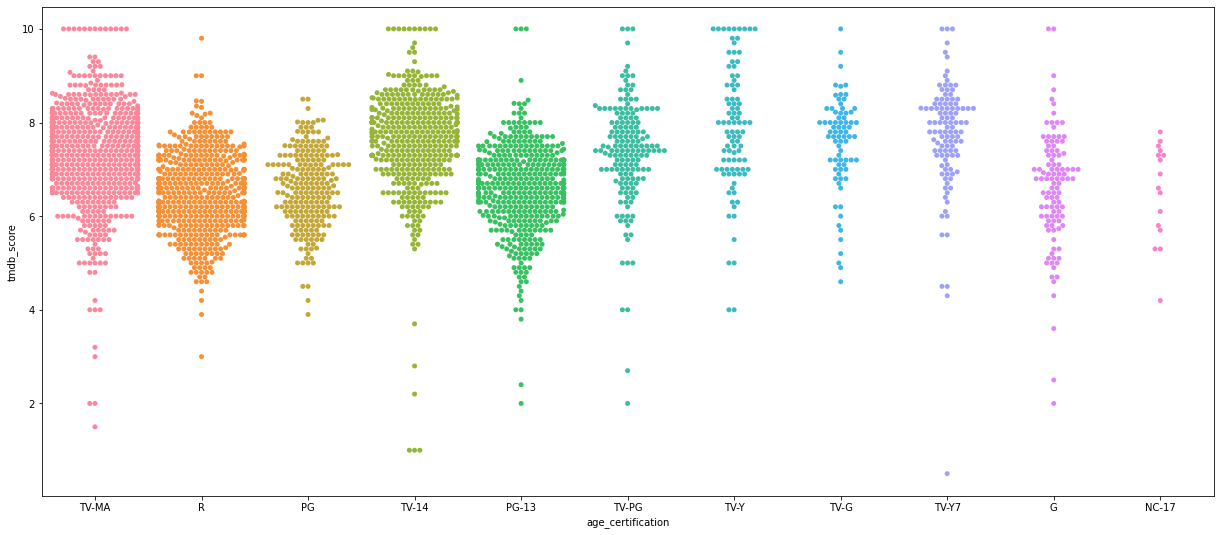

In [13]:
fig,ax = plt.subplots(figsize=[21,9])
sns.swarmplot(ax=ax,x=titles['age_certification'],y=titles['tmdb_score'])